In [30]:
from bs4 import BeautifulSoup
import requests
import re
import json
import matplotlib.pyplot as plt

soup = BeautifulSoup(requests.get("https://www.worldometers.info/coronavirus/country/south-africa/").content, "html.parser")
# script = soup.find("script", string=lambda t: 'Highcharts' in t if t else False)
graph_cases_daily = soup.find("script", string=lambda t: 'Highcharts' and 'graph-cases-daily' in t if t else False).get_text()

In [28]:
# Extract xAxis categories
dates_regex = re.compile(r"xAxis:\s*{\s*categories:\s*(\[[^\]]+\])")
dates_matched = dates_regex.search(graph_cases_daily)
dates = json.loads(dates_matched.group(1)) if dates_matched else []

# Extract daily cases data
daily_cases_pattern = re.compile(r"series:\s*\[\s*{[^}]*name:\s*'Daily Cases'[^}]*data:\s*(\[[^\]]+\])")
daily_cases_match = daily_cases_pattern.search(graph_cases_daily)
daily_cases_data = json.loads(daily_cases_match.group(1)) if daily_cases_match else []

print("xAxis Categories:", dates)
print("Daily Cases Data:", daily_cases_data)

xAxis Categories: ['Feb 15, 2020', 'Feb 16, 2020', 'Feb 17, 2020', 'Feb 18, 2020', 'Feb 19, 2020', 'Feb 20, 2020', 'Feb 21, 2020', 'Feb 22, 2020', 'Feb 23, 2020', 'Feb 24, 2020', 'Feb 25, 2020', 'Feb 26, 2020', 'Feb 27, 2020', 'Feb 28, 2020', 'Feb 29, 2020', 'Mar 01, 2020', 'Mar 02, 2020', 'Mar 03, 2020', 'Mar 04, 2020', 'Mar 05, 2020', 'Mar 06, 2020', 'Mar 07, 2020', 'Mar 08, 2020', 'Mar 09, 2020', 'Mar 10, 2020', 'Mar 11, 2020', 'Mar 12, 2020', 'Mar 13, 2020', 'Mar 14, 2020', 'Mar 15, 2020', 'Mar 16, 2020', 'Mar 17, 2020', 'Mar 18, 2020', 'Mar 19, 2020', 'Mar 20, 2020', 'Mar 21, 2020', 'Mar 22, 2020', 'Mar 23, 2020', 'Mar 24, 2020', 'Mar 25, 2020', 'Mar 26, 2020', 'Mar 27, 2020', 'Mar 28, 2020', 'Mar 29, 2020', 'Mar 30, 2020', 'Mar 31, 2020', 'Apr 01, 2020', 'Apr 02, 2020', 'Apr 03, 2020', 'Apr 04, 2020', 'Apr 05, 2020', 'Apr 06, 2020', 'Apr 07, 2020', 'Apr 08, 2020', 'Apr 09, 2020', 'Apr 10, 2020', 'Apr 11, 2020', 'Apr 12, 2020', 'Apr 13, 2020', 'Apr 14, 2020', 'Apr 15, 2020', 'Apr 

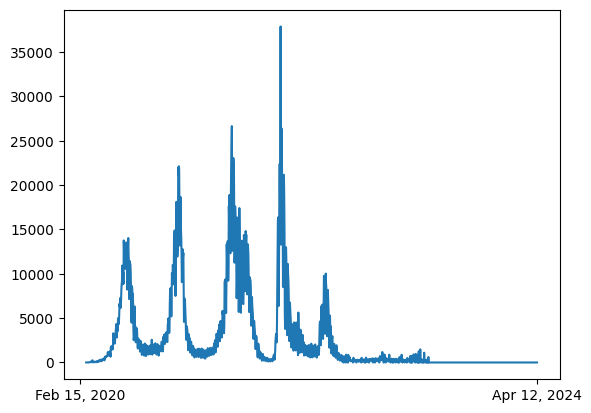

In [34]:
plt.plot(dates, daily_cases_data)
plt.xticks([0, len(dates) - 1], [dates[0], dates[-1]])
plt.show()